In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
# データ読み込み
bb = pd.read_csv("baseball_salary.csv")

In [3]:
# データを最初の5行だけ表示
bb.head(5)

,球団,推定年俸,守備,年数,年齢,身長,体重,血液型,投打,年,...,併殺打,出塁率,長打率,OPS,RC27,XR27,球団勝率,プレーオフ,球団平均得点,球団打率
0,c,21000,外野手,11,29,177,90,AB型,右左,2017,...,6,0.398,0.505,0.903,7.70,7.52,0.633,2,5.15,0.273
1,c,19000,内野手,7,28,171,72,A型,右右,2017,...,9,0.311,0.405,0.716,4.10,4.01,0.633,2,5.15,0.273
2,c,14000,内野手,5,29,171,85,A型,右左,2017,...,5,0.398,0.407,0.805,6.41,6.26,0.633,2,5.15,0.273
3,c,11500,内野手,7,38,196,126,不明,右右,2017,...,8,0.368,0.532,0.900,6.80,6.90,0.633,2,5.15,0.273
4,c,11000,内野手,20,41,189,102,B型,右右,2017,...,7,0.389,0.461,0.850,6.55,6.54,0.633,2,5.15,0.273


In [4]:
# 中身を'打率'と'打点'の列のみにする
dataset = bb.loc[:, ['打率', '打点']]

# 先頭の5行だけ表示して確認
dataset.head()

,打率,打点
0,0.308,92
1,0.271,56
2,0.290,60
3,0.265,78
4,0.292,48


In [5]:
# MinMaxScalerで正規化を実施
ms = MinMaxScaler()
data = ms.fit_transform(dataset)

In [6]:
# 正規化後のデータを確認（5行分だけ表示）
print(data[:5])

[[0.616      0.87619048]
 [0.542      0.53333333]
 [0.58       0.57142857]
 [0.53       0.74285714]
 [0.584      0.45714286]]


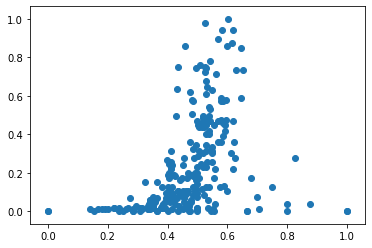

In [7]:
# 正規化後の打率と打点の散布図を描画する
plt.scatter(data[:,0],data[:,1])

In [8]:
# 最大クラスター数を10としてWCSS値を取
wcss = []
cluster = np.arange(1,10)

for k in cluster:
    km = KMeans(n_clusters = k,init="k-means++",n_init=10).fit(data)
    wcss.append(km.inertia_)

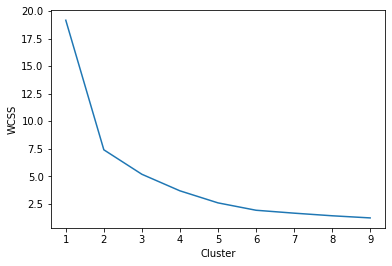

In [9]:
# 上記結果をplotにて可視化
fig = plt.figure(figsize=(6,4))
plt.plot(cluster,wcss)
plt.xlabel("Cluster")
plt.ylabel("WCSS")
plt.show()